# Processamento de linguagem natural (NLP)

Neste notebook eu usei o dataset do [IMBD em português](https://www.kaggle.com/luisfredgs/imdb-ptbr) para classificar o sentimento nas resenhas dadas aos filmes, usando o modelo de Regressão logística.



É uma sub área da Inteligência Artificial que se dedica a entender a relação da linguagem humana (falada, escrita) e a linguagem de máquina.


In [57]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     /Users/lauradamacenodealmeida/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
import unidecode

%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from nltk.stem import RSLPStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauradamacenodealmeida/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lauradamacenodealmeida/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### Análise de sentimentos

Identificar o sentimento das coisas seja na escrita ou em imagens.

## Opinião negativa

In [3]:
df.text_pt[2]

'Primeiro de tudo eu odeio esses raps imbecis, que não poderiam agir se tivessem uma arma pressionada contra suas testas. Tudo o que eles fazem é amaldiçoar e atirar um no outro e agir como uma versão clichê de gangsters. O filme não leva mais de cinco minutos para explicar o que está acontecendo antes que já estivessem no armazém. Não há um único personagem simpático nesse filme, com exceção do sem-teto, que também é o único com metade do cérebro. William Paxton e William Sadler são ambos "hill billies" e Sadler é tão vilão quanto os gângsteres. Eu não gostava dele desde o começo. O filme está cheio de violência sem sentido e especialidade de Walter Hills: pessoas caindo de janelas com vidros voando por toda parte. Não há praticamente nenhum enredo e é um grande problema quando você torce por ninguém. Todo mundo morre, exceto Paxton e o sem-teto e todos recebem o que merecem. Os dois únicos negros que podem atuar são o sem-teto e o viciado, mas são atores de profissão, não irritantes 

## Opinião positiva

In [4]:
df.text_pt[49000]

'Quinze anos depois e Paris Is Burning ainda está em chamas. Este é um clássico dos filmes gays negros, junto com os outros filmes homossexuais negros honorários, The Color Purple e Mahoganoy. Este trabalho seminal captura underground e underclass ou seja, "underserved cultura gay negra e latina e comunidade como nenhum outro trabalho antes ou depois, incluindo todas as retrospectivas e renderings homossexuais sentimentais do Harlem Renascimento. Eles são bons, mas este é o melhor desafio eu digo o único" Um filme real que você vai encontrar sobre o assunto. Sua implacável Cunty, a clássica música house, se torna aclamada por Hollywood, um acampamento hilariante e inimaginável, como só nós fazemos e crítica social. Tudo isso por uma diretora branca que obviamente deve ter sido uma irmã Gurl ou Mizz Thing em uma vida anterior Eu poderia continuar, mas acho que você entendeu o ponto: amo este filme!'

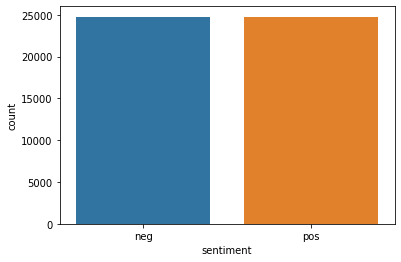

In [5]:
sns.countplot(df['sentiment'])

In [6]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

## Tratamento da coluna Sentiment

In [7]:
classificacao = df.sentiment.replace(['neg','pos'],[0,1])

In [8]:
df['classificacao'] = classificacao

In [9]:
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Pré-processamento

In [10]:
#token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [11]:
from string import punctuation
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações. Existem diversos algoritmos para realizar a “stemmização”, seja em Português, sejam em outros idiomas.



In [12]:
frase_processada = list()

def tokenize_frase(frase):
    stemmer = RSLPStemmer()
    palavras_texto = frase.lower()
    palavras_texto = token_pontuacao.tokenize(frase)
    palavra = []
    stopwords = nltk.corpus.stopwords.words('portuguese')
    for i in palavras_texto:
        if not i.isnumeric() and i.lower() not in stopwords and i not in pontuacao:
            palavra.append(stemmer.stem(i.lower()))
    #     frase = nltk.word_tokenize(frase)
    frase_processada.append(' '.join(palavra))
    #return palavra

In [13]:
def removerAcentosECaracteresEspeciais(frase):
    
    frase_sem_acento = unidecode.unidecode(frase) #remove acentos
    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    #return re.sub('[^a-zA-Z0-9 \\\]', '', frase_sem_acento)
    return frase_sem_acento

In [14]:
frase_processada_stem = list()

def stemming(sentence):
    stemmer = RSLPStemmer()
    palavras_texto = token_pontuacao.tokenize(sentence)
    phrase = []
    for word in palavras_texto:
        phrase.append(stemmer.stem(word))
        
    frase_processada_stem.append(' '.join(phrase))

    #return phrase

In [15]:
def preprocess(data):
    data  = removerAcentosECaracteresEspeciais(data)
    tokenize_frase(data)
    #stemming(frase_processada)


    

In [16]:
df.text_pt.map(preprocess)
df['tratamento_1'] = frase_processada
#df['tratamento_2'] = frase_processada_stem

In [17]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exempl motiv maior film aca sao mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil nao pod agir arm pre...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata nao palavr apropri verdad sao ta...


## Wordcloud de frases positivas e negativas

In [18]:
def wordcloud_pos(texto, coluna_texto):
    frases_pos = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in frases_pos[coluna_texto]]) #lista contendo todas as frases

    word_cloud = WordCloud(width=800, height=500,max_font_size=110).generate(todas_palavras)
    plt.figure(figsize=[10,10])
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title('Wordcloud de frases com feedback positivo')

    plt.axis("off")
    plt.show()


In [19]:
def wordcloud_neg(texto, coluna_texto):
    frases_neg = texto.query("sentiment == 'neg'")    
    todas_palavras = ' '.join([texto for texto in frases_neg[coluna_texto]]) #lista contendo todas as frases

    word_cloud = WordCloud(width=800, height=500,max_font_size=110).generate(todas_palavras)
    plt.figure(figsize=[10,10])
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title('Wordcloud de frases com feedback negativo')
    plt.axis("off")
    plt.show()

O wordcloud remove caracteres unicos(a,e,i,o) e pontuação, o método CountVectorize também implementa isso.

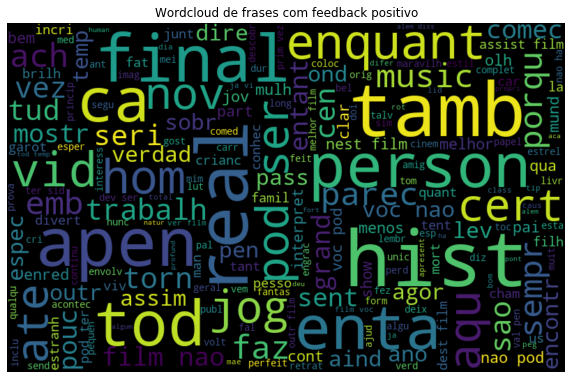

In [20]:
wordcloud_pos(df,'tratamento_1')

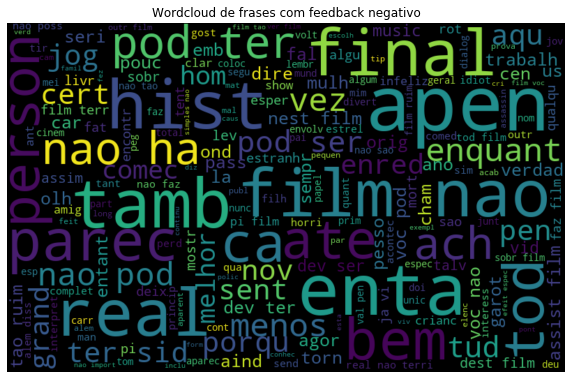

In [21]:
wordcloud_neg(df,'tratamento_1')

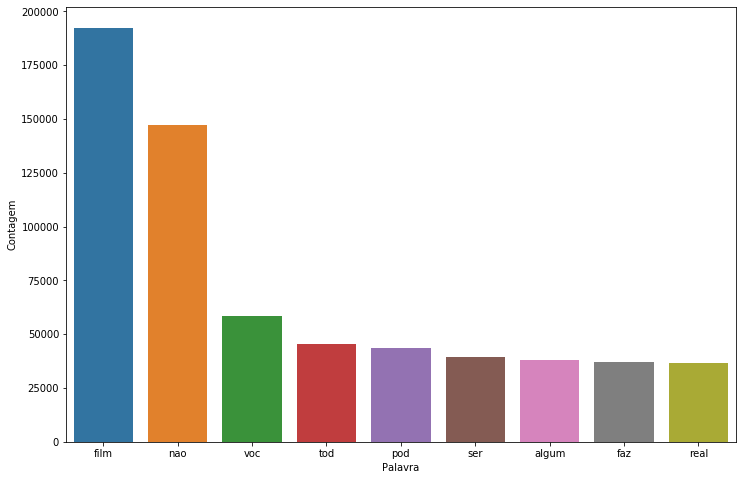

In [22]:
def pareto(texto, coluna, quantidade):    
    todas_palavras = ' '.join([text for text in texto[coluna]]) #lista contendo todas as frases
    token_espaco = tokenize.WhitespaceTokenizer()
    token = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns= "Frequencia", n=quantidade)
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia")
    ax.set(ylabel="Contagem")
    plt.show()
    
pareto(df,'tratamento_1', 9)

In [23]:
df.tratamento_1[0]

'vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual ha pouc simples nao import nenhum person maior fantasm armari person cost realiz log inici esquec ate tard nao import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor nao mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz nao deslig hor'

## Bag of words

In [24]:
# vai pegar nossa frase e criar um vetor
#ele por padrão colcoa a frase toda em letra minuscula
vectorizer = CountVectorizer(max_features=50)

In [25]:
corpus = df['tratamento_1']

In [26]:
#usar o parametro max_features, que delimita o vetor com o tamanho que eu desejo. 
#Mas as palavras que vão aparecer nele vão ser apenas as palavras que mais se repetem
bag_of_words = vectorizer.fit_transform(corpus)

In [27]:
vectorizer.get_feature_names()

['ach',
 'aind',
 'algum',
 'ano',
 'apen',
 'assist',
 'ate',
 'bem',
 'bom',
 'cen',
 'cois',
 'dev',
 'diz',
 'enta',
 'faz',
 'film',
 'final',
 'gost',
 'grand',
 'ha',
 'hist',
 'lo',
 'melhor',
 'muit',
 'nao',
 'outr',
 'parec',
 'part',
 'person',
 'pesso',
 'pod',
 'porqu',
 'pouc',
 'prim',
 'qualqu',
 'real',
 'sao',
 'sent',
 'ser',
 'sobr',
 'tamb',
 'tao',
 'temp',
 'tent',
 'ter',
 'tod',
 'tud',
 'ver',
 'vez',
 'voc']

In [28]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names() )

In [29]:
matriz

,ach,aind,algum,ano,apen,assist,ate,bem,bom,cen,...,tamb,tao,temp,tent,ter,tod,tud,ver,vez,voc
0,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,4,0,2,0,0,...,0,0,0,0,0,1,0,4,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,3,2,0,1,2
3,0,1,0,1,1,1,2,1,0,1,...,0,0,1,0,1,4,0,1,0,1
4,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,2,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
49455,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49456,0,0,3,1,0,1,2,2,1,1,...,0,1,1,1,0,4,1,0,1,2
49457,1,0,3,4,0,0,0,0,0,0,...,4,0,1,0,0,1,0,2,0,2


## Criando o modelo

In [30]:
y = df['classificacao']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.3, random_state=42)



In [32]:
X_test.shape

(14838, 50)

In [33]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vectorizer = CountVectorizer(max_features=50)
    bag_of_words = vectorizer.fit_transform(texto[coluna_texto])
    
    X = bag_of_words
    y = texto[coluna_classificacao]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
    regressao_logistic = LogisticRegression()
    regressao_logistic.fit(X_train,y_train)
    return regressao_logistic.score(X_test,y_test)

print(classificar_texto(df, "tratamento_1", "classificacao"))

0.6800107831244103


## TF-IDF

O TF-IDF retorna uma matriz com os pesos atribuídos para cada palavra

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)


In [55]:
tfidf_bruto = tfidf.fit_transform(df.tratamento_1)

In [40]:
pd.DataFrame(
    tfidf_bruto.todense(),
    columns = tfidf.get_feature_names()
)

,ach,aind,algum,ano,apen,assist,ate,bem,bom,cen,...,tamb,tao,temp,tent,ter,tod,tud,ver,vez,voc
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197024,0.169241,0.000000,0.000000,...,0.000000,0.000000,0.178563,0.000000,0.000000,0.000000,0.193502,0.000000,0.164388,0.000000
1,0.000000,0.121679,0.000000,0.000000,0.000000,0.423128,0.000000,0.213656,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083211,0.000000,0.453032,0.000000,0.083900
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130571,0.125502,0.000000,0.000000,0.000000,0.299293,0.292882,0.000000,0.124408,0.201182
3,0.000000,0.123970,0.000000,0.116937,0.106924,0.107774,0.253414,0.108840,0.000000,0.120883,...,0.000000,0.000000,0.114835,0.000000,0.112114,0.339110,0.000000,0.115391,0.000000,0.085480
4,0.000000,0.000000,0.157516,0.000000,0.181749,0.183193,0.000000,0.185004,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0.380425,0.000000,0.143840,0.000000,0.000000,0.167287,0.000000,0.168941,0.000000,0.187635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193160,0.000000,0.000000,0.000000
49455,0.000000,0.000000,0.600793,0.000000,0.346610,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49456,0.000000,0.000000,0.223293,0.093923,0.000000,0.086564,0.203541,0.174839,0.092195,0.097093,...,0.000000,0.085660,0.092235,0.102753,0.000000,0.272372,0.099952,0.000000,0.084913,0.137315
49457,0.142631,0.000000,0.323576,0.544422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.516580,0.000000,0.133659,0.000000,0.000000,0.098675,0.000000,0.268612,0.000000,0.198984


## Classificação sem bigram

Nesta classificação eu não implementei o bigram, porém eu limitei um número maximo de features. E com os testes realizados, com ou sem o parâmetro max_features com a implementação do bigram melhorou mais a acurácia do modelo



In [46]:
def classificar_tfidf(texto, coluna_texto, coluna_classificacao):
    regressao_logistic = LogisticRegression()
    tfidf_bruto = tfidf.fit_transform(texto[coluna_texto])
    X = tfidf_bruto
    y = texto[coluna_classificacao]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    regressao_logistic.fit(X_train, y_train)
    acuracia_tfidf = regressao_logistic.score(X_test,y_test)
    return acuracia_tfidf
print(classificar_tfidf(df,'tratamento_1','classificacao'))

0.8856988812508424


## Classificação com bigram e ngram

In [64]:
from nltk import ngrams

In [68]:
regressao_logistic = LogisticRegression()
tfidf_bigram = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) #vai me gerar uma matriz com bigram e ngram
    
vetor_tfidf = tfidf_bigram.fit_transform(df.tratamento_1)
    
y = df.classificacao
    
X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, y, test_size=0.3, random_state=42)
regressao_logistic.fit(X_train, y_train)
acuracia_tfidf_bigram = regressao_logistic.score(X_test,y_test)
print(acuracia_tfidf_bigram)


0.8870467718021297


## Verificando os pesos das palavras no modelo de Regressão Linear

Neste trecho eu pego os pesos dos coeficientes e realizo a transposição "regressao_logistic.coef_[0].T"


In [71]:
pesos = pd.DataFrame(
    regressao_logistic.coef_[0].T,
    index = tfidf_bigram.get_feature_names()

)
pesos.nlargest(50,0)

,0
otim,9.580870
excel,8.285540
perfeit,6.537923
maravilh,5.796418
favorit,5.481647
incri,5.347298
divert,5.228367
tamb,4.966522
brilh,4.565208
ador,4.278732


In [70]:
pesos.nsmallest(10,0)

,0
ruim,-11.118251
pi,-10.965821
horri,-9.226984
nao,-8.099205
terri,-7.842048
chat,-7.062091
nad,-6.294734
parec,-6.238876
tent,-5.508447
nenhum,-5.375528
